In [27]:
#Snippet to convert one run binary ETROC Data in ak.arrays and then generate a hitmap

from etroc_binary_decoder import converter, root_dumper
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from pathlib import Path
from typing import List

paths = [
    Path("/Users/leonardolanteri/Desktop/ETROC_runs/output_run_8000_rb0.dat"),
    Path("/Users/leonardolanteri/Desktop/ETROC_runs/output_run_8001_rb0.dat").
]


def etroc_hitmaps_generator(path: Path) -> None:
    """
    Generates a hitmap from ETROC binary data one path.
    """

    # Set CMS style for plots
    plt.style.use(hep.style.CMS)

    #Convert the paths in strings and the binaries in ak.arrays
    etroc_binary_paths = [str(path)] 
    etroc_unpacked_data = converter(etroc_binary_paths, skip_trigger_check=True)
    etroc_data = root_dumper(etroc_unpacked_data)

    if etroc_data is None:
        print(f"No ETROC data available for {path}.")
        return 

    # Initialize hitmap array
    hits = np.zeros([16, 16])
    mask = []  # Define mask if needed

    # Populate the hitmap
    for ev in etroc_data:
        for row, col in zip(ev.row, ev.col):
            if (row, col) not in mask:
                hits[row][col] += 1

    # Plot the hitmap
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    cax = ax.matshow(hits)
    ax.set_ylabel(r'$Row$')
    ax.set_xlabel(r'$Column$')
    fig.colorbar(cax, ax=ax)
    run_number = path.name.split("_")[2]
    ax.set_title(f"Hitmap run_{run_number}", fontsize=20)
    plt.show()

etroc_hitmaps_generator(paths[0])

SyntaxError: invalid syntax (3596147230.py, line 13)

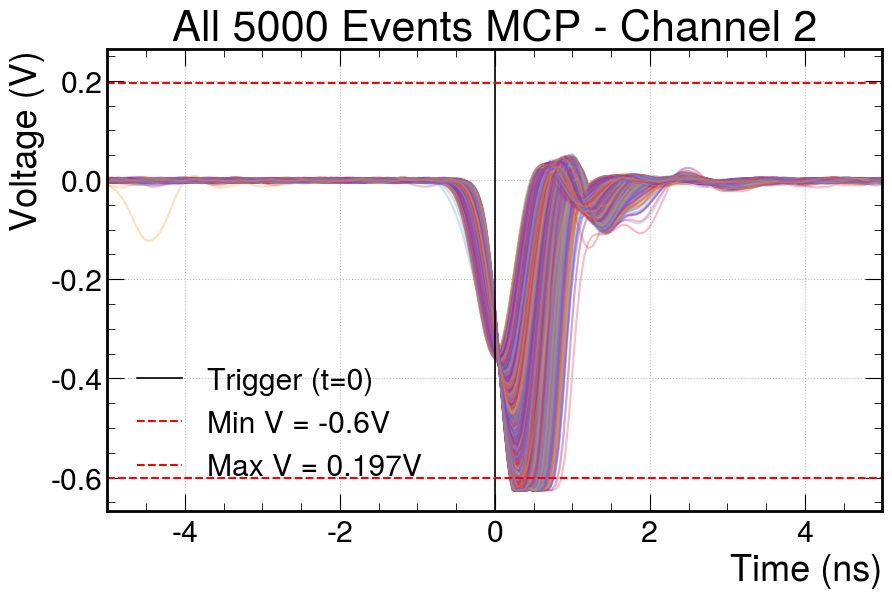

In [ ]:
#Snippet to convert MCP scope traces and generate Waveforms plots

import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from pathlib import Path
from typing import List
from lecroy_binary_decoder import LecroyReader


paths = [
    Path("/Users/leonardolanteri/Desktop/MCP_runs/C2--Trace10600.trc")
]

reader = LecroyReader(str(paths[0]))

def MCP_trace_generator(converted_data):
    """
    Plots all events from a LecroyReader object on the same figure.
    """

    plt.figure(figsize=(10, 6))

    for event_num in range(converted_data.n_events):
        t, v = converted_data.x[event_num] * 1e9, converted_data.y[event_num]
        plt.plot(t, v, alpha=0.3)  # Alpha for transparency to see overlapping traces

    # Add trigger & min/max voltage lines
    plt.axvline(0, label="Trigger (t=0)", color='black', linewidth=1.2)
    plt.axhline(reader.minVerticalValue, label=f'Min V = {reader.minVerticalValue:.3}V', color='red', linestyle='--')
    plt.axhline(reader.maxVerticalValue, label=f'Max V = {reader.maxVerticalValue:.3}V',color='red', linestyle='--')

    # Labels and legend
    plt.xlim(-5, 5)
    plt.xlabel("Time (ns)")
    plt.ylabel("Voltage (V)")
    plt.title(f"All {converted_data.n_events} Events MCP - Channel {reader.channel}")
    plt.legend()
    plt.grid()
    plt.show()



MCP_trace_generator(reader)

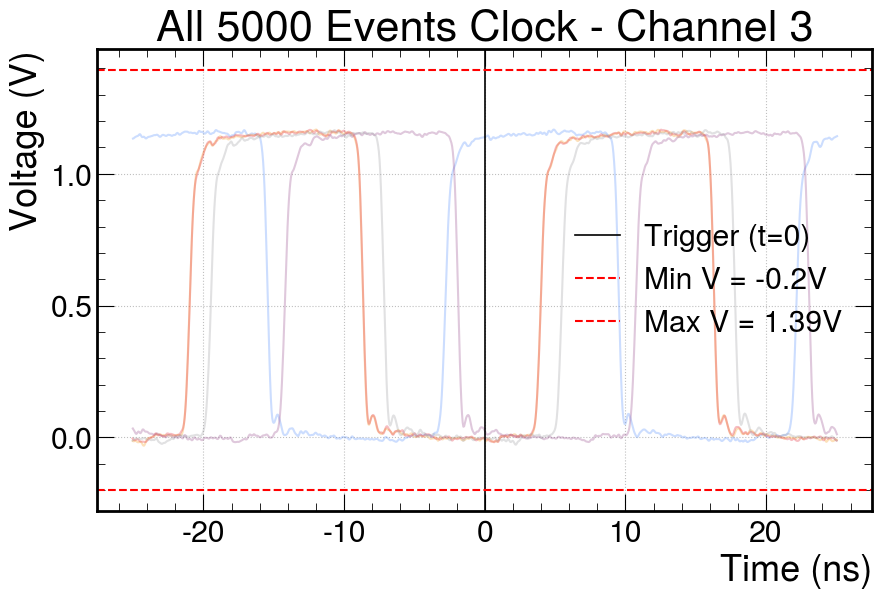

In [ ]:
#Snippet to convert MCP scope traces and generate Waveforms plots

import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from pathlib import Path
from typing import List
from lecroy_binary_decoder import LecroyReader


paths = [
    Path("/Users/leonardolanteri/Desktop/Clock_runs/C3--Trace10600.trc")
]

reader = LecroyReader(str(paths[0]))

def MCP_trace_generator(converted_data):
    """
    Plots all events from a LecroyReader object on the same figure.
    """

    plt.figure(figsize=(10, 6))

    for event_num in range(5):
        t, v = converted_data.x[event_num] * 1e9, converted_data.y[event_num]
        plt.plot(t, v, alpha=0.3)  # Alpha for transparency to see overlapping traces

    # Add trigger & min/max voltage lines
    plt.axvline(0, label="Trigger (t=0)", color='black', linewidth=1.2)
    plt.axhline(reader.minVerticalValue, label=f'Min V = {reader.minVerticalValue:.3}V', color='red', linestyle='--')
    plt.axhline(reader.maxVerticalValue, label=f'Max V = {reader.maxVerticalValue:.3}V',color='red', linestyle='--')

    # Labels and legend
    #plt.xlim(-10, 10)
    plt.xlabel("Time (ns)")
    plt.ylabel("Voltage (V)")
    plt.title(f"All {converted_data.n_events} Events Clock - Channel {reader.channel}")
    plt.legend()
    plt.grid()
    plt.show()



MCP_trace_generator(reader)

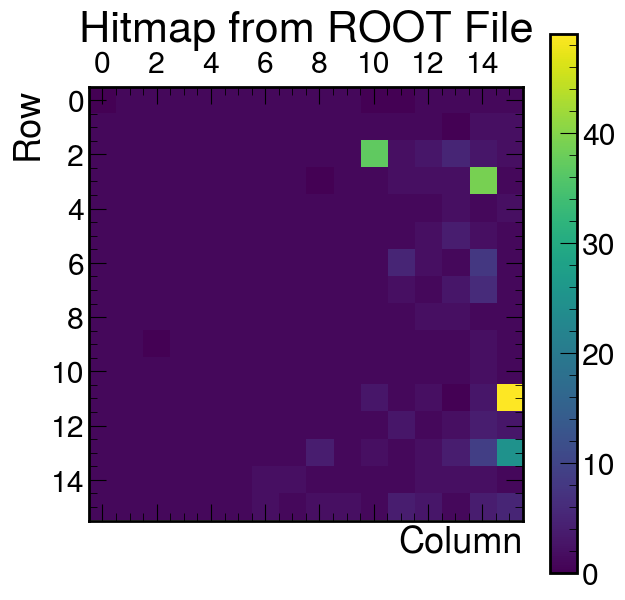

In [ ]:
#Snippet to generate ETROC hitmaps from a root file

import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from pathlib import Path
from typing import List
import uproot as root
import awkward as ak


# Specify the path to your ROOT file
file_path = "/Users/leonardolanteri/Desktop/run_112243.root"



# Open the ROOT file
root_file = root.open(file_path)

tree = root_file["pulse"]

plt.style.use(hep.style.CMS)


def generate_hitmap_from_root(tree):
    # Extract row and col arrays
    row = tree["row"].array()
    col = tree["col"].array()
    chipid = tree["chipid"].array()

    # Initialize 16x16 hitmap
    hits = np.zeros((16, 16))

    # Loop over events and fill the hitmap
    for i in range(len(row)):  
        for r, c in zip(row[i], col[i]):
            #if chipid[i]==442:
            hits[r, c] += 1

    # Plot the hitmap
    fig, ax = plt.subplots(figsize=(7, 7))
    cax = ax.matshow(hits, cmap="viridis")
    fig.colorbar(cax)
    ax.set_xlabel("Column")
    ax.set_ylabel("Row")
    ax.set_title("Hitmap from ROOT File")
    plt.show()

   # all_chipids = [chip for event_chipids in chipid for chip in event_chipids]
   # print(set(all_chipids))



generate_hitmap_from_root(tree)





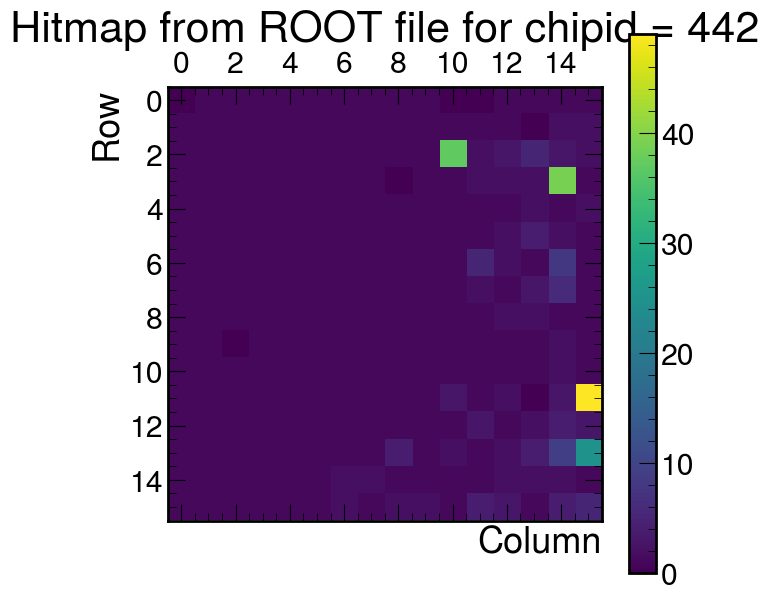

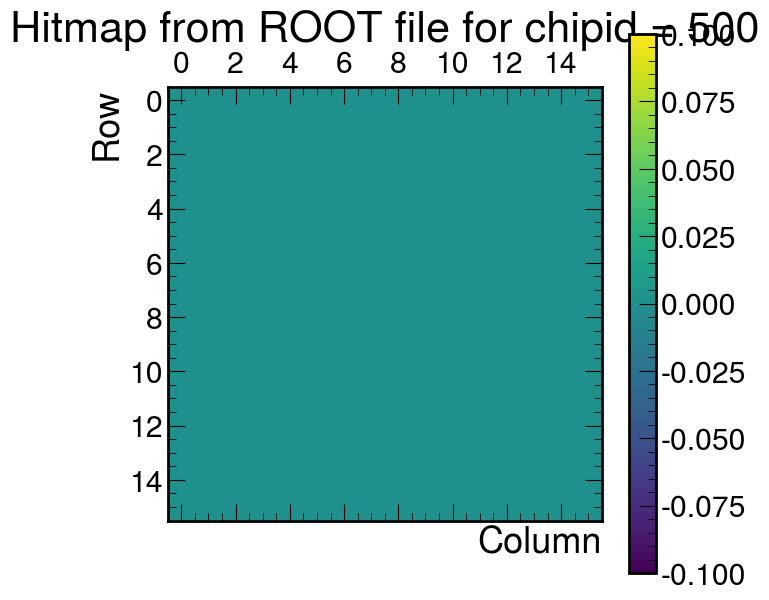

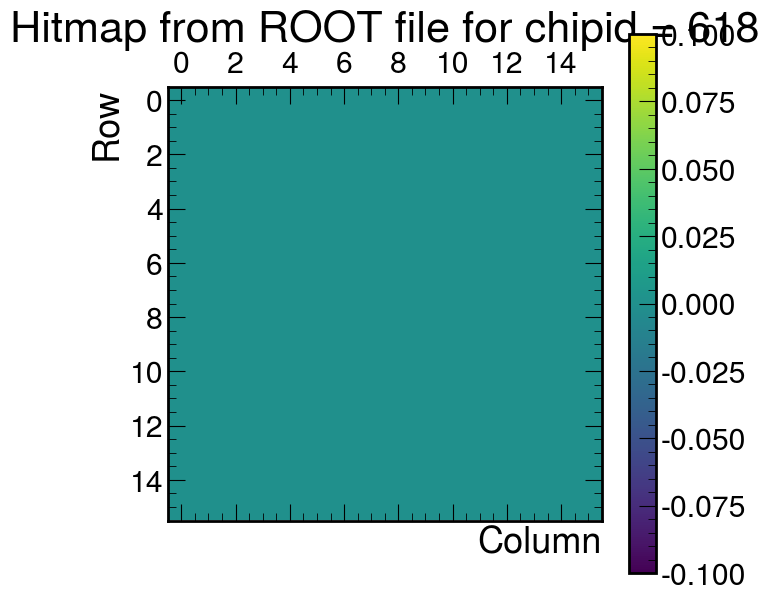

In [29]:
from pathlib import Path
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak

def hitmaps_generator_from_rootmerged(root_file_path: Path, chipid_list: list = [442]) -> None:
    """
    Function that generates the ETROC hitmaps (one for every chipID provided) from a root file that contains:
    A) ETROC data (needed for each chipId)
    B) MCP traces (not needed)
    C) Clock traces (not needed)
    """



    # Set CMS style for plots and open root file
    plt.style.use(hep.style.CMS)
    root_file = uproot.open(str(root_file_path))
    tree = root_file["pulse"]
    
    # As of now the needed branches are just chipid col and row, the snippets converts them to akarrays
    branches = ["chipid", "row", "col"]
    events = tree.arrays(branches, library="ak")
    
    # Loop over each desired chipid
    for chip_id in chipid_list:
       

        hits = np.zeros((16, 16))
        # Loop over events and fill the hitmap only if the event's chipid includes chip_id
        for ev in events:
            # Check if the event's chipid field contains our chip_id
            if chip_id in ev["chipid"]:
                # Loop through hit coordinates in the event and update hit counts
                for r, c in zip(ev["row"], ev["col"]):
                    hits[r, c] += 1
        


        fig, ax = plt.subplots(figsize=(7, 7))
        cax = ax.matshow(hits, cmap="viridis")
        fig.colorbar(cax)
        ax.set_xlabel("Column")
        ax.set_ylabel("Row")
        ax.set_title(f"Hitmap from ROOT file for chipid = {chip_id}")
        plt.show()

# Example usage:
root_file = Path("/Users/leonardolanteri/Desktop/run_112243.root")
hitmaps_generator_from_rootmerged(root_file, chipid_list=[442, 500, 618])


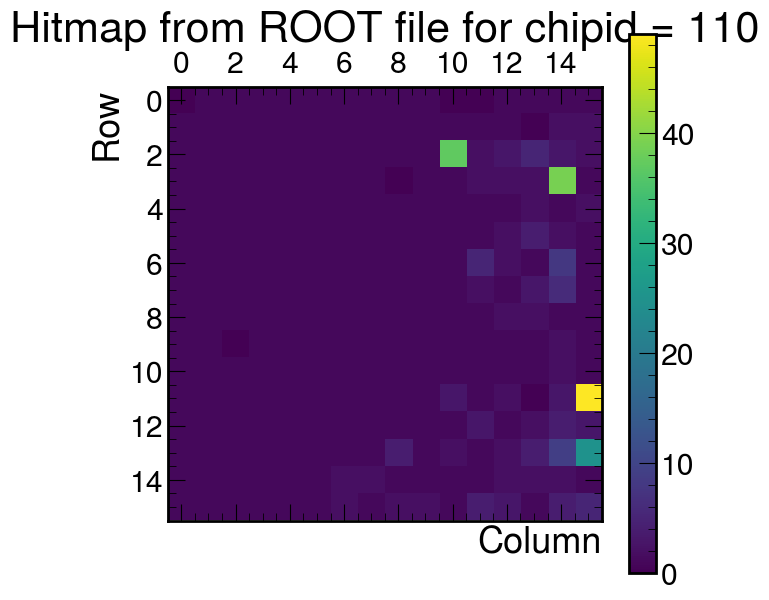

In [57]:
from pathlib import Path
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak
import time

def root_hitmap_generator(root_file_path: Path) -> None:
    """
    Function that generates the ETROC hitmaps (one for every chipID present in the root file) from a root file that contains:
    A) ETROC data (needed for each chipId)
    B) MCP traces (not needed here)
    C) Clock traces (not needed here)
    """
    # Set CMS style for plots and open the root tree
    plt.style.use(hep.style.CMS)
    root_file = uproot.open(str(root_file_path))
    tree = root_file["pulse"]
    
    # the only the necessary branches are chipid, row and col which are converted into an awkward Array
    branches = ["chipid", "row", "col"]
    events = tree.arrays(branches, library="ak")
    chipid_list = (np.unique(np.concatenate(events["chipid"].to_list())))


    for chip_id in chipid_list:
        hits = np.zeros((16, 16))
        
        # zip zip zip :)
        for event_chipids, event_rows, event_cols in zip(events["chipid"], events["row"], events["col"]):
            #print(event_chipids, event_rows, event_cols)
            for cid, r, c in zip(event_chipids, event_rows, event_cols):
                if cid == chip_id:
                    hits[r, c] += 1
        
        chip_id_converted = int(chip_id) >> 2
        # Plot the hitmap for this chip_id
        fig, ax = plt.subplots(figsize=(7, 7))
        cax = ax.matshow(hits, cmap="viridis")
        fig.colorbar(cax, ax=ax)
        ax.set_xlabel("Column")
        ax.set_ylabel("Row")
        ax.set_title(f"Hitmap from ROOT file for chipid = {chip_id_converted}")
        plt.show()


# Example usage:
root_file = Path("/Users/leonardolanteri/Desktop/run_112243.root")
root_hitmap_generator(root_file)